In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
from jupyter_dash import JupyterDash
from wordcloud import WordCloud
import numpy as np

In [2]:
df = pd.read_csv('GrammarandProductReviews.csv')
df.head(5)

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


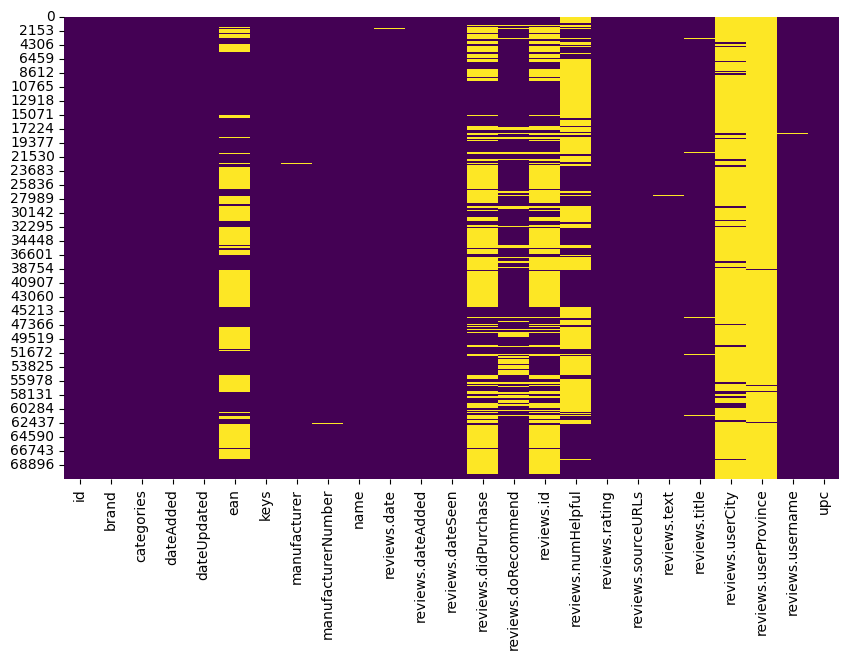

In [3]:
# Create a boolean DataFrame with missing values marked as True
missing_data = df.isnull()

# Plot a heatmap of missing data
plt.figure(figsize=(10, 6))
sns.heatmap(missing_data, cbar=False, cmap='viridis')
plt.show()

In [4]:
# Get the data type of each column
column_types = df.dtypes

# Print the data types
column_types

id                       object
brand                    object
categories               object
dateAdded                object
dateUpdated              object
ean                      object
keys                     object
manufacturer             object
manufacturerNumber       object
name                     object
reviews.date             object
reviews.dateAdded        object
reviews.dateSeen         object
reviews.didPurchase      object
reviews.doRecommend      object
reviews.id              float64
reviews.numHelpful      float64
reviews.rating            int64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity         object
reviews.userProvince     object
reviews.username         object
upc                      object
dtype: object

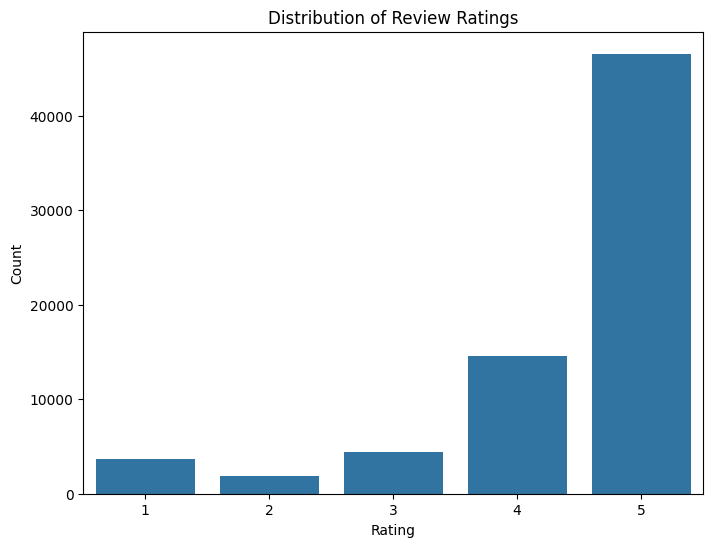

In [5]:
# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='reviews.rating', data=df)
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [6]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
from jupyter_dash import JupyterDash

# Create a JupyterDash app
app = JupyterDash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("Distribution of Review Ratings"),
    
    # Dropdown to select brand
    html.Label("Select a Brand:"),
    dcc.Dropdown(
        id='brand-dropdown',
        options=[{'label': brand, 'value': brand} for brand in df['brand'].unique()],
        value=None,  # Default value, shows all brands
        multi=False  # Single selection
    ),
    
    # Range slider for rating filter
    html.Label("Select Rating Range:"),
    dcc.RangeSlider(
        id='rating-slider',
        min=int(df['reviews.rating'].min()),
        max=int(df['reviews.rating'].max()),
        step=1,
        marks={i: str(i) for i in range(int(df['reviews.rating'].min()), int(df['reviews.rating'].max()) + 1)},
        value=[int(df['reviews.rating'].min()), int(df['reviews.rating'].max())]  # Default range (all ratings)
    ),
    
    dcc.Graph(id='ratings-countplot')
])

# Define callback to update the graph based on selected brand and rating range
@app.callback(
    Output('ratings-countplot', 'figure'),
    [Input('brand-dropdown', 'value'),
     Input('rating-slider', 'value')]
)
def update_graph(selected_brand, selected_rating_range):
    # Filter the DataFrame based on the selected brand and rating range
    filtered_df = df[(df['reviews.rating'] >= selected_rating_range[0]) & 
                     (df['reviews.rating'] <= selected_rating_range[1])]
    
    if selected_brand:
        filtered_df = filtered_df[filtered_df['brand'] == selected_brand]
    
    # Create the histogram (count plot)
    fig = px.histogram(filtered_df, x='reviews.rating', nbins=5, labels={'x': 'Rating'}, title='Distribution of Review Ratings')
    fig.update_layout(
        xaxis_title='Rating',
        yaxis_title='Count',
        bargap=0.1
    )
    
    return fig

# Run app
app.run_server(mode='inline')

/Users/gustavogonzalez/miniconda3/envs/ds_proy2/lib/python3.12/site-packages/dash/dash.py:585: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



In [7]:
# Get the top 10 brands by number of reviews
top_brands = df['brand'].value_counts().head(10)

# Create the Dash app
app = JupyterDash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("Top 10 Brands by Number of Reviews"),
    
    # Dropdown to select a brand
    html.Label("Select a Brand:"),
    dcc.Dropdown(
        id='brand-dropdown',
        options=[{'label': brand, 'value': brand} for brand in top_brands.index],
        value=top_brands.index[0]  # Default value
    ),
    
    # Graph for the bar plot
    dcc.Graph(id='barplot'),
    
    # Display the selected brand's review count
    html.Div(id='brand-info', style={'margin-top': '20px'})
])

# Define callback to update the graph and brand info
@app.callback(
    [Output('barplot', 'figure'),
     Output('brand-info', 'children')],
    [Input('brand-dropdown', 'value')]
)
def update_graph(selected_brand):
    # Create a bar plot using Plotly Express
    fig = px.bar(
        x=top_brands.values,
        y=top_brands.index,
        orientation='h',  # Horizontal bars
        labels={'x': 'Number of Reviews', 'y': 'Brand'},
        title='Top 10 Brands by Number of Reviews'
    )
    fig.update_layout(
        xaxis_title='Number of Reviews',
        yaxis_title='Brand',
        bargap=0.1
    )
    
    # Get the number of reviews for the selected brand
    review_count = top_brands[selected_brand]
    brand_info = f"{selected_brand} has {review_count} reviews."
    
    return fig, brand_info

# Run app
app.run_server(mode='inline', port=8052)

/Users/gustavogonzalez/miniconda3/envs/ds_proy2/lib/python3.12/site-packages/dash/dash.py:585: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



In [8]:
# Create a JupyterDash app
app = JupyterDash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("Word Cloud of Reviews"),
    
    # Dropdown to select rating
    html.Label("Select a Rating:"),
    dcc.Dropdown(
        id='rating-dropdown',
        options=[{'label': str(i), 'value': i} for i in df['reviews.rating'].unique()],
        value=None,  # Default value to show all ratings
        multi=False  # Single selection
    ),
    
    # Graph for word cloud
    dcc.Graph(id='wordcloud-graph')
])

# Define callback to update the word cloud graph
@app.callback(
    Output('wordcloud-graph', 'figure'),
    Input('rating-dropdown', 'value')
)
def update_wordcloud(selected_rating):
    # Filter reviews based on the selected rating
    if selected_rating is not None:
        filtered_text = ' '.join(df[df['reviews.rating'] == selected_rating]['reviews.text'].dropna())
    else:
        filtered_text = ' '.join(df['reviews.text'].dropna())
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)
    
    # Create an image from the word cloud
    img = np.array(wordcloud)
    
    # Create a figure for Plotly
    fig = px.imshow(img)
    fig.update_xaxes(visible=False)
    fig.update_yaxes(visible=False)
    fig.update_layout(title='Most Common Words in Reviews')
    
    return fig

# Run app
app.run_server(mode='inline', port=8053)

In [9]:
# Create the Dash app
app = JupyterDash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("Helpfulness vs. Ratings"),
    
    # Dropdown to select a brand
    html.Label("Select a Brand:"),
    dcc.Dropdown(
        id='brand-dropdown',
        options=[{'label': brand, 'value': brand} for brand in df['brand'].unique()],
        value=df['brand'].unique()[0]  # Default value
    ),
    
    # Graph for Helpfulness vs. Ratings
    dcc.Graph(id='helpfulness-vs-ratings')
])

# Define callback to update the graph
@app.callback(
    Output('helpfulness-vs-ratings', 'figure'),
    Input('brand-dropdown', 'value')
)
def update_graph(selected_brand):
    # Filter the DataFrame by the selected brand
    filtered_df = df[df['brand'] == selected_brand]
    
    # Create a scatter plot using Plotly Express
    fig = px.scatter(
        filtered_df,
        x='reviews.numHelpful',
        y='reviews.rating',
        title=f'Helpfulness vs. Ratings for {selected_brand}',
        labels={'reviews.numHelpful': 'Number of Helpful Votes', 'reviews.rating': 'Rating'},
        hover_data=['reviews.numHelpful', 'reviews.rating']
    )
    
    fig.update_layout(
        xaxis_title='Number of Helpful Votes',
        yaxis_title='Rating',
        height=600
    )
    
    return fig

# Run app
app.run_server(mode='inline', port=8054)